# Lab 4: Functions and Tables

Welcome to Lab 4 !


## Introduction
Topics to cover in this lab include:

   #### 1. Functions and CEO Incomes
   #### 2. `apply`ing functions with CEO incomes
   #### 3. Using `.join()` with Burrito-ful San Diego
   #### 4. Using `.pivot_table()` and `.groupby()` with Faculty salaries





Helpful Link on Data types in Pandas:https://pbpython.com/pandas_dtypes.html


Run these cells below to import your modules and get started:

In [21]:
import pandas as pd
import numpy as np 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

 ## 1. Functions and CEO Incomes
 
In this question, we'll look at the 2015 compensation of CEOs at the 100 largest companies in California. The data was compiled from a Los Angeles Times analysis, and ultimately came from filings mandated by the SEC from all publicly-traded companies. Two companies have two CEOs, so there are 102 CEOs in the dataset.

We've copied the raw data from the LA Times page into a file called **`raw_compensation.csv`**. (The page notes that all dollar amounts are in millions of dollars.)

In [22]:
ceo_2015 = pd.read_csv("raw_compensation.csv")
ceo_2015

,Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay
0,1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362.00000
1,2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362.00000
2,3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477.00000
3,4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342.00000
4,5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338.00000
...,...,...,...,...,...,...,...,...,...
97,98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.94,-11%,$0.93,$0.00,$0.02,17.00000
98,99,Jose L. Laparte,PriceSmart (San Diego),$0.81,-7%,$0.71,$0.00,$0.10,32.00000
99,100,Jack Dorsey,Twitter (San Francisco),$0.07,(No previous year),$0.00,$0.00,$0.07,0.63000
100,101,Elon R. Musk,Tesla Motors (Palo Alto),$0.04,6%,$0.04,$0.00,$0.00,0.46000


We want to compute the average of the CEOs' pay. Try running the cell below.

In [23]:
np.average(ceo_2015["Total Pay"][0])

TypeError: cannot perform reduce with flexible type

You should see a **TypeError**. Let's examine why this error occurred by looking at the values in the `Total Pay` column. 

**Question 1:** Set `total_pay_type` to the data type of the `Total Pay` column.


In [ ]:
total_pay_type = type(ceo_2015.loc[0,'Total Pay'])
total_pay_type

**Question 2:** You should have found that the values in the `Total Pay` column are strings. It doesn't make sense to take the average of string values, so we need to convert them to numbers if we want to do this. Extract the first value in `Total Pay`.  It's Mark Hurd's pay in 2015, in *millions* of dollars.  Call it `mark_hurd_pay_string`.


In [ ]:
mark_hurd_pay_string = ceo_2015.loc[0,'Total Pay']
mark_hurd_pay_string

**Question 3:** Convert `mark_hurd_pay_string` to a number of *dollars*. 

Some hints, as this question requires multiple steps:
- The string method `strip` will be useful for removing the dollar sign; it removes a specified character from the start or end of a string.  For example, the value of `"100%".strip("%")` is the string `"100"`.  
- You'll also need the function `float`, which converts a string that looks like a number to an actual number.  
- Finally, remember that the answer should be in dollars, not millions of dollars.

In [ ]:
mark_hurd_pay = float(mark_hurd_pay_string.strip("$"))
mark_hurd_pay

To compute the average pay, we need to do this for every CEO.  But that looks like it would involve copying this code 102 times.

This is where functions come in.  First, we'll define a new function, giving a name to the expression that converts "total pay" strings to numeric values.  Later in this lab, we'll see the payoff: we can call that function on every pay string in the dataset at once.

The next section of this lab explains how to define a function For now, just fill in the ellipses in the cell below.

**Question 4:** Copy the expression you used to compute `mark_hurd_pay`, and use it as the return expression of the function below. But make sure you replace the specific `mark_hurd_pay_string` with the generic `pay_string` name specified in the first line in the `def` statement.



In [ ]:
def convert_pay_string_to_number(strxng):
    return float(strxng.strip("$"))

Running that cell doesn't convert any particular pay string. Instead, it creates a function called `convert_pay_string_to_number` that can convert *any* string with the right format to a number representing millions of dollars.

We can call our function just like we call the built-in functions we've seen. It takes one argument -- a string -- and it returns a float.

In [ ]:
convert_pay_string_to_number('$42')

In [ ]:
mark_hurd_pay_string = ceo_2015.loc[0,'Total Pay']
convert_pay_string_to_number(mark_hurd_pay_string)

**Question 5:** Create a bar chart with the top five ceo total pays. Labels for each bar should be the names of the CEO's. The y x-axis should say "CEO's" and the y-axis should say "Dollars in millions $." Title you chart "Top 5 CEO Total Pays for 2015." Utilize the `convert_pay_string_to_number` function you define earlier

In [ ]:
last_names = []
names = []
pay = []
ceo_pay = []
#get pay 
for index in range(5):
    pay.append(convert_pay_string_to_number(ceo_2015.loc[index,'Total Pay']))
    
#get name of CEO
for index in range(5):
    names.append(ceo_2015.loc[index,'Name'])

#last name 
for name in names:
    name = name.split()
    last_names.append(name[-1])

plt.bar(range(len(last_names)), pay)
plt.title("Top 5 CEO Total Pays for 2015")
plt.ylabel("Dollars in Millions to 1e7")
plt.xlabel("CEO's")
plt.xticks(range(len(last_names)), last_names)
plt.show()


So, what have we gained by defining the `convert_pay_string_to_number` function? 
Well, without it, we'd have to copy the code `10**6 * float(some_pay_string.strip("$"))` each time we wanted to convert a pay string.  Now we just call a function whose name says exactly what it's doing.

## 2. `apply`ing functions with CEO incomes

Defining a function is a lot like giving a name to a value with `=`.  In fact, a function is a value just like the number 1 or the text "data"!

For example, we can make a new name for the built-in function `max` if we want:

In [ ]:
our_name_for_max = max
our_name_for_max(2, 6)

The old name for `max` is still around:

In [ ]:
max(2, 6)

Try just writing `max` or `our_name_for_max` (or the name of any other function) in a cell, and run that cell.  Python will print out a (very brief) description of the function.

In [ ]:
max

Now try writing `?max` or `?our_name_for_max` (or the name of any other function) in a cell, and run that cell.  A information box should show up at the bottom of your screen a longer description of the function

*Note: You can also press Shift+Tab after clicking on a name to see similar information!*

In [ ]:
?max

In [ ]:
?our_name_for_max

Let's look at what happens when we set `max`to a non-function value. You'll notice that a TypeError will occur when you try calling `max`. Things like integers and strings are not callable. Look out for any functions that might have been renamed when you encounter this type of error

In [ ]:
max = 6
max(2, 6)

In [ ]:
# This cell resets max to the built-in function. Just run this cell, don't change its contents
import builtins
max = builtins.max

Why is this useful?  Since functions are just values, it's possible to pass them as arguments to other functions.  Here's a simple but not-so-practical example: we can make an array of functions.

**Question 1:** Make a list called `some_functions` containing any 3 other functions you've seen.


In [ ]:
some_functions = [min, sum, pow]
some_functions

A more useful example of passing functions to other functions as arguments is the table method `apply`.

**`apply.()`** calls a function many times, once on *each* element in a column of a table.  It produces an *array* of the results.  Here we use **`apply.()`** to convert every CEO's pay to a number, using the function you defined:

In [ ]:
ceo_2015['Total Pay'].apply(convert_pay_string_to_number)

**Question 2:** Using **`apply.()`**, create a table that's a copy of `ceo_2015` with one additional column called `Total Pay ($)`.  That column should contain the result of applying `convert_pay_string_to_number` to the `Total Pay` column (as we did above).  Call the new table `ceo_incomes_2015`.

In [ ]:
ceo_incomes_2015 = ceo_2015
ceo_incomes_2015["Total Pay ($)"] = ceo_2015['Total Pay'].apply(convert_pay_string_to_number)
ceo_incomes_2015

Now that we have all the pays as numbers, we can learn more about them through computation.

**Question 3:** Compute the average total pay of the CEOs in the dataset.

In [ ]:
average_total_pay = np.average(ceo_incomes_2015["Total Pay ($)"])
average_total_pay

**Question 4:** Companies pay executives in a variety of ways: in cash, by granting stock or other equity in the company, or with ancillary benefits (like private jets).  Compute the proportion of each CEO's pay that was cash.  (Your answer should be an array of numbers, one for each CEO in the dataset.)

*Note:* When you answer this question, you'll encounter a red box appearing below your code cell that says something like `RuntimeWarning: invalid value encountered in true_divide`. Don't worry too much about the message. Warnings are raised by Python when it encounters an unusual condition in your code, but the condition is not severe enough to warrant throwing an error. 

The warning below is Python's cryptic way of telling you that you're dividing a number by zero. If you extract the values in `Total Pay ($)` as an array, you'll see that the last element is 0.

In [ ]:
cash_proportion = []

for index in range(102): 
    cash_proportion.append(convert_pay_string_to_number(ceo_2015.loc[index,'Cash Pay'])/ceo_2015.loc[index,'Total Pay ($)'])
cash_proportion

**Why is `.apply()` useful?**

For operations like arithmetic, or the functions in the NumPy library, you don't need to use `.apply()`, because they automatically work on each element of an array.  But there are many things that don't.  The string manipulation we did in today's lab is one example.  Since you can write any code you want in a function, `.apply()` gives you total control over how you operate on data.

Earlier, we computed the average pay among the CEOs in 2015.  The average doesn't tell us everything about the amounts CEOs are paid, though.  Maybe just a few CEOs make the bulk of the money, even among these 102.

We can use a *histogram* method to display the *distribution* of a set of numbers.  The table method `hist` takes a single argument, the name of a column of numbers.  It produces a histogram of the numbers in that column.

**Question 5:** Make a histogram of the total pay of the CEOs in `compensation`. Your x-axis should be titled "Dollars in millions $." Your y-axis should be titled "Frequency." Your title should be "2015 California CEO Income Distribution."

In [ ]:
compensation = []
for index in range(102):
    compensation.append((ceo_2015.loc[index,'Total Pay ($)']))

plt.hist(compensation, edgecolor = 'black', linewidth = 1.2)
plt.xlabel("Dollars in millions $")
plt.ylabel("Frequency")
plt.title("2015 California CEO Income Distribution")
plt.show()


## 3. Using `.join()` with Burrito-ful San Diego

Tam, Margaret and Winifred are trying to use Data Science to find the best burritos in San Diego! Their friends Irene and Maya provided them with two comprehensive datasets on many burrito establishments in the San Diego area taken from (and cleaned from): https://www.kaggle.com/srcole/burritos-in-san-diego/data

The following cell reads in a table called `ratings` which contains names of burrito restaurants, their Yelp rating, Google rating, as well as their Overall rating. It also reads in a table called `burritos_types` which contains names of burrito restaurants, their menu items, and the cost of the respective menu item at the restaurant.

In [25]:
#Just run this cell
ratings = pd.read_csv("ratings.csv")
burritos_types = pd.read_csv("burritos_types.csv")

In [26]:
ratings.head()

,Name,Yelp,Google,Overall
0,Albertacos,3.5,3.9,3.450
1,Burrito Factory,4.5,4.8,3.500
2,Burros and Fries,3.5,4.1,3.575
3,Caliente Mexican Food,3.5,4.4,3.250
4,California Burrito Company,3.5,4.4,3.200


In [27]:
burritos_types.head()

,Name,Menu_Item,Cost
0,Albertacos,California,5.70
1,Albertacos,Carne asada,5.25
2,"Alberto's 623 N Escondido Blvd, Escondido, CA ...",Carne Asada,4.59
3,Burrito Box,Steak with guacamole,11.50
4,Burrito Factory,Steak everything,7.35


**Question 1.** It would be easier if we could combine the information in both tables. Assign `burritos` to the result of joining the two tables together.

*Note: it doesn't matter which table you put in as the argument to the table method, either order will work for the autograder tests.*

In [28]:
burritos = ratings.join(burritos_types.set_index('Name'), on='Name')
burritos

,Name,Yelp,Google,Overall,Menu_Item,Cost
0,Albertacos,3.5,3.9,3.450,California,5.70
0,Albertacos,3.5,3.9,3.450,Carne asada,5.25
1,Burrito Factory,4.5,4.8,3.500,Steak everything,7.35
2,Burros and Fries,3.5,4.1,3.575,California,7.19
2,Burros and Fries,3.5,4.1,3.575,Carne asada,6.89
...,...,...,...,...,...,...
81,Vallarta express,3.5,4.0,3.500,Mahi,7.30
81,Vallarta express,3.5,4.0,3.500,Philly,6.95
81,Vallarta express,3.5,4.0,3.500,Quesa,6.95
81,Vallarta express,3.5,4.0,3.500,Quesaburro,6.95


**Question 2.** Let's look at how the Yelp scores compare to the Google scores in the `burritos` table. Make a scatter plot with Yelp scores on the x-axis and the Google scores on the y-axis. The title should be "Yelp and Google Scores."


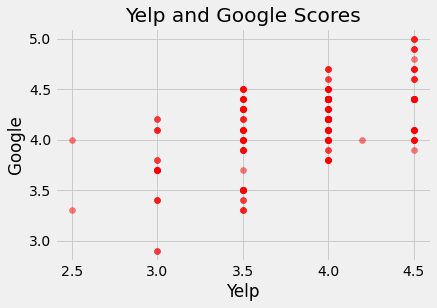

In [29]:
Google = burritos['Google'].values
Yelp = burritos['Yelp'].values

plt.scatter(Yelp, Google, c='red', alpha=0.5)
plt.title("Yelp and Google Scores")
plt.xlabel('Yelp')
plt.ylabel("Google")
plt.show()

**Question 3.** Looking at the scatter plot you just made in Question 1.2, do you notice any pattern(s) (i.e. is one of the two types of scores consistently higher than the other one)? If so, describe them **briefly** in the cell below.

There is a linear relationship. Restaurants that have a low review on yelp, will more than likely have a low review on Google too.

## 4. Using `.pivot_table()` and `.groupby()` with Faculty salaries

This exercise is designed to give you practice using the methods **`.pivot_table()`** and **`.groupby()`**. 


In the next cell, we load a dataset created by the [Daily Cal](http://projects.dailycal.org/paychecker/) which contains Berkeley faculty, their departments, their positions, and their gross salaries in 2015.

In [30]:
raw_profs = pd.read_csv("faculty.csv")
profs = raw_profs[raw_profs['year'] == 2015]
profs = profs.drop(columns =["year", "title"])
profs = profs.rename(columns = {"title_category":"position"})
profs = profs.reset_index()
profs = profs.drop(columns = ['index'])
profs

,name,department,position,gross_salary
0,CYNTHIA ABAN,South & Southeast Asian Studies,lecturer,64450.0
1,PIETER ABBEEL,Computer Science,associate professor,184998.0
2,SALLY ABEL,Law,lecturer,3466.0
3,ELIZABETH ABEL,English,professor,138775.0
4,DOR ABRAHAMSON,Education,associate professor,100300.0
...,...,...,...,...
2054,DARREN ZOOK,Political Science,lecturer,67020.0
2055,DANIEL ZOUGHBIE,Middle Eastern Studies,lecturer,4480.0
2056,GABRIEL ZUCMAN,Economics,assistant professor,126283.0
2057,MACIEJ ZWORSKI,Mathematics,professor,218928.0


**Question 1:** Using the `.groupby()` and `.apply()` functions, create a table called `department_counts` with two columns. The first column should be called `department` and have the name of every department once, and the second column should be called `count` with each value in that second column containing the count of the total number of all faculty members in that department. 

*Hint:* You should use numpys `np.count_nonzero`. 


In [31]:
department_counts = profs.groupby('department')['gross_salary'].apply(np.count_nonzero).reset_index().rename(columns={'department':'department', 'gross_salary':'count'})
department_counts


,department,count
0,African American Studies,15
1,Agricultural and Resource Economics and Policy,3
2,Anthroplogy,28
3,Architecture,46
4,Art History,19
...,...,...
66,Sociology,37
67,South & Southeast Asian Studies,21
68,Spanish and Portuguese,20
69,Statistics,24


**Question 2:** Using `.pivot_table()`, create a table called `avg_dprt_position`. The index should be all of the available departments; the columns should be the different positions a department can have; the values should the gross_salary. Fill the NaN values with zero. Each value in the row should be rounded by two decimal places.

*Hint:* Create a sub table containing the **three** columns that you'll be working with.

*Note:* Refer to this documentation on how to use `.pivot_table()` for help: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html?highlight=pivot_table#pandas.DataFrame.pivot_table


In [32]:
avg_dprt_position = profs.pivot_table(profs, index = 'department', columns='position').fillna(0).round(2)
avg_dprt_position

gross_salary  \
position                                       assistant professor   
department                                                           
African American Studies                                  81667.00   
Agricultural and Resource Economics and Policy                0.00   
Anthroplogy                                               82853.33   
Architecture                                             106775.00   
Art History                                               67757.50   
...                                                            ...   
Sociology                                                136378.50   
South & Southeast Asian Studies                           77837.50   
Spanish and Portuguese                                    78033.33   
Statistics                                               131616.25   
Theater, Dance and Performance Studies                    84763.00   

                                                                              \
position                                       associate professor  lecturer   
department                                                                     
African American Studies                                 112472.57  50814.50   
Agricultural and Resource Economics and Policy                0.00  16062.00   
Anthroplogy                                              103637.67  22395.50   
Architecture                                             119617.12  21712.61   
Art History                                              111001.50  39497.50   
...                                                            ...       ...   
Sociology                                                116174.60  44519.00   
South & Southeast Asian Studies                          114551.00  54956.00   
Spanish and Portuguese                                    93754.33  46907.00   
Statistics                                               164915.00  64701.29   
Theater, Dance and Performance Studies                   100151.00  29397.93   

                                                           
position                                        professor  
department                                                 
African American Studies                        160600.00  
Agricultural and Resource Economics and Policy  224717.00  
Anthroplogy                                     179706.53  
Architecture                                    135232.56  
Art History                                     145254.43  
...                                                   ...  
Sociology                                       174759.05  
South & Southeast Asian Studies                 170333.50  
Spanish and Portuguese                          111687.17  
Statistics                                      205075.89  
Theater, Dance and Performance Studies          108984.00  

[71 rows x 4 columns]

**Question 3:** Give an explanation as to why some of the row values are `0` in the `department_ranges` table from the previous question.

Answer = 'They do not have certain roles within their department, for example some departments do not have assistant professors and thus 0 for the value'
